<a href="https://colab.research.google.com/github/Ambarish07/ml/blob/master/happy_or_sad_emoji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [15]:

import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>DESIRED_ACCURACY):
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

--2020-05-24 06:05:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 2607:f8b0:4004:804::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2020-05-24 06:05:26 (204 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [0]:
# Directory with our training pictures
train_happy_dir = os.path.join('/tmp/h-or-s/happy')

# Directory with our training human pictures
train_sad_dir = os.path.join('/tmp/h-or-s/sad')


train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])

train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])


['happy2-06.png', 'happy2-16.png', 'happy2-00.png', 'happy2-01.png', 'happy1-15.png', 'happy1-11.png', 'happy2-04.png', 'happy1-17.png', 'happy1-00.png', 'happy1-12.png']
['sad2-02.png', 'sad1-16.png', 'sad1-06.png', 'sad1-19.png', 'sad2-04.png', 'sad1-15.png', 'sad1-14.png', 'sad1-18.png', 'sad2-12.png', 'sad2-11.png']


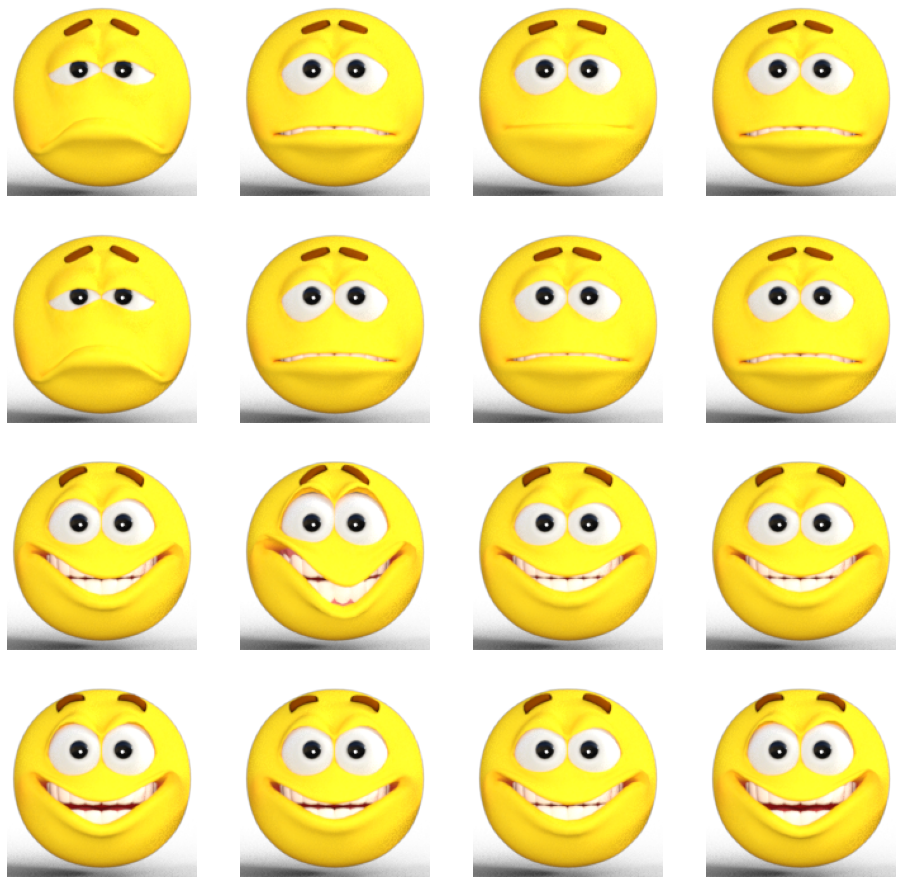

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0



# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_sad_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_happy_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [0]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [0]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        "/tmp/h-or-s",  
        target_size=(150, 150), 
        batch_size=10,
        class_mode='binary')

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [0]:
# This code block should call model.fit and train for
# a number of epochs. 
history = model.fit_generator(
      train_generator,
      steps_per_epoch=2,  
      epochs=15,
      verbose=1,
      callbacks=[callbacks])
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
2/2 [==============================] - 0s 10ms/step - loss: 8.3737 - acc: 0.2000
Epoch 2/15
2/2 [==============================] - 0s 11ms/step - loss: 0.9416 - acc: 0.5500
Epoch 3/15
2/2 [==============================] - 0s 11ms/step - loss: 0.7724 - acc: 0.3000
Epoch 4/15
2/2 [==============================] - 0s 15ms/step - loss: 0.6821 - acc: 0.4500
Epoch 5/15
2/2 [==============================] - 0s 12ms/step - loss: 0.5571 - acc: 0.6000
Epoch 6/15
2/2 [==============================] - 0s 11ms/step - loss: 0.4943 - acc: 0.8000
Epoch 7/15
2/2 [==============================] - 0s 12ms/step - loss: 0.4443 - acc: 0.9000
Epoch 8/15
2/2 [==============================] - 0s 10ms/step - loss: 0.8449 - acc: 0.5000
Epoch 9/15
2/2 [==============================] - 0s 13ms/step - loss: 0.6509 - acc: 0.6000
Epoch 10/15
2/2 [==============================] - 0s 10ms/step - loss: 0.3641 - acc: 0.9000
Epo

HAPPY IMAGE


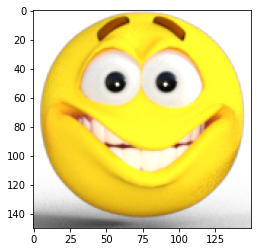

In [28]:
path_happy = '/tmp/validation-h-or-s/happy.png'
img = image.load_img(path_happy, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])

classes = model.predict(images, batch_size=10)
if classes[0] > 0.5:
  print("SAD IMAGE")
else:
  print("HAPPY IMAGE")

#plot the image
img = mpimg.imread(path_happy)
plt.imshow(img)

HAPPY IMAGE


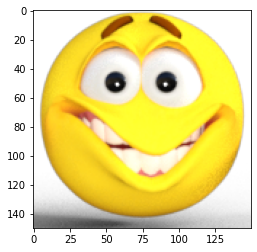

In [29]:
path_happy = '/tmp/validation-h-or-s/happy1.png'
img = image.load_img(path_happy, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])

classes = model.predict(images, batch_size=10)
if classes[0] > 0.5:
  print("SAD IMAGE")
else:
  print("HAPPY IMAGE")

#plot the image
img = mpimg.imread(path_happy)
plt.imshow(img)

SAD IMAGE


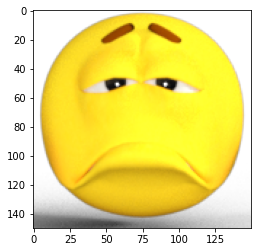

In [30]:
path_sad = '/tmp/validation-h-or-s/sad.png'
img = image.load_img(path_sad, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])

classes = model.predict(images, batch_size=10)
if classes[0] > 0.5:
  print("SAD IMAGE")
else:
  print("HAPPY IMAGE")

#plot the image
img = mpimg.imread(path_sad)
plt.imshow(img)

SAD IMAGE


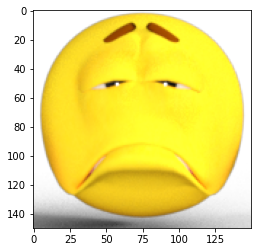

In [31]:
path_sad = '/tmp/validation-h-or-s/sad1.png' 
img = image.load_img(path_sad, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])

classes = model.predict(images, batch_size=10)
if classes[0] > 0.5:
  print("SAD IMAGE")
else:
  print("HAPPY IMAGE")

#plot the image
img = mpimg.imread(path_sad)
plt.imshow(img)